# Hierarchical clustering -Agglomerative Clustering 

Hierarchical clustering (HCA) is an unsupervised learning method for clustering data points.The algorithm builds clusters by measuring the dissimilarities between data.

hierarchical clustering generally fall into two types:

**Agglomerative :** This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

**Divisive :** This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.


![](https://cdn.educba.com/academy/wp-content/uploads/2019/11/Hierarchical-Clustering-Analysis.png)

# Agglomerative Clustering (AGNES)


**Algorithm**:
Compute the proximity matrix

Let each data point be a cluster

Repeat: Merge two closest clusters and update the proximity matrix until 1/ K cluster remains

![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Hierarchical_clustering_simple_diagram.svg/418px-Hierarchical_clustering_simple_diagram.svg.png)

# Importing Libraries

In [1]:
import pandas as pd     
#for data cleaning and analysis

import numpy as np
#for large, multi-dimensional arrays and matrices

import matplotlib.pyplot as plt
#for creating static, animated, and interactive visualizations in Python


from sklearn.cluster import AgglomerativeClustering 
# Used to cache the output of the computation of the tree.

from sklearn.preprocessing import StandardScaler,normalize
#to make sure features are on the same scale and make it easier to process by ML algorithms.

from sklearn.decomposition import PCA
#transforming the data into fewer dimensions


from sklearn.metrics import silhouette_score
#for to measure how close each point in one cluster is to points in the neighboring clusters


import scipy.cluster.hierarchy as shc
#for to find the roots of the forest formed.

# Loading Dataset

In [2]:
df = pd.read_csv('../input/credit-card/CC GENERAL.csv')

# Pre Processing

In [3]:
# Information of Null Values and Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
# Sum of Null Values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
#Top 5 recors
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Cleaning of Data

Data is almost clean but 'MINIMUM_PAYMENTS' contains 313 null values so we can:

1. Drop these rows
2. Fill values by using 'filna()' Forward or backward filling

In [6]:
df.fillna(method ='ffill', inplace = True) 
#(inplace = True) changes in memory.

In [7]:
#After filling null values
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

There is no need of Cust_ID becaue we have Pandas ID so we can drop it

In [9]:
df.drop('CUST_ID', axis = 1 , inplace = True) 

In [10]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Standardize data

In [11]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 
#scaled_df

# Difference b/w Scalling and Normalization
In scaling, we change the range of your data.
In normalization, we change the shape of the distribution of data.

# Normalizing the Data 

In [12]:
normalized_df = normalize(scaled_df) 
#normalized_df

Data is in Array form so have to change this array in Dataframe

In [13]:
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 

In [14]:
normalized_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.312038,-0.106331,-0.181129,-0.152156,-0.148808,-0.198985,-0.343796,-0.289304,-0.301518,-0.287892,-0.202942,-0.217975,-0.409413,-0.225497,-0.130160,-0.224036,0.153753
1,0.219928,0.037539,-0.131224,-0.099751,-0.127038,0.728177,-0.341439,-0.189662,-0.256269,0.160403,0.030762,-0.165387,0.192455,0.228782,0.024353,0.065458,0.100798
2,0.126684,0.146785,-0.030505,0.030851,-0.128792,-0.132251,0.359775,0.757449,-0.259805,-0.191342,-0.134881,-0.030888,0.234046,-0.108741,-0.028363,-0.148900,0.102189
3,0.020571,-0.426063,0.097223,0.228832,-0.190449,-0.154451,-0.424878,-0.167299,-0.384185,-0.108474,-0.138062,-0.231084,0.346093,-0.250827,-0.041942,-0.220185,0.151110
4,-0.151630,0.218959,-0.195282,-0.146778,-0.192118,-0.197278,-0.428601,-0.168765,-0.387551,-0.285424,-0.201202,-0.233109,-0.382671,-0.153993,-0.110323,-0.222114,0.152435


There are 16 attributes. To find out most important features we use feature selection or Dimension Reduction technique  PCA(Principal Component Analysis).

# PCA

In [15]:
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2']

In [16]:
X_principal.head(2)

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544829


# Visualisation

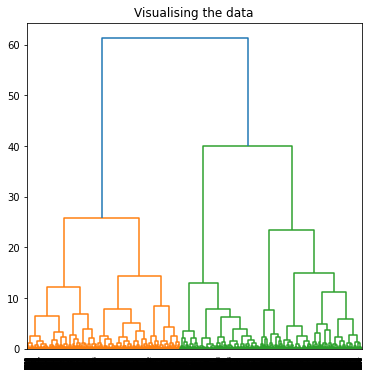

In [19]:
plt.figure(figsize =(6, 6))  # create  figures using matplotlib
plt.title('Visualising the data') #title of graph using matplotlib
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 
#Dendograms are used to divide a given cluster into many different clusters.

The above image shows that the optimal number of clusters should be 2 for the given data.

# Bar Graph

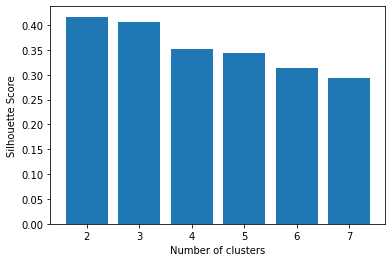

In [20]:
silhouette_scores = [] 

#Silhouette Score usedDetermine the optimal number of clusters
for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

# Building and Visualizing the different clustering models for different values of k

# K = 2

In [21]:
ac2 = AgglomerativeClustering(n_clusters = 2)

# Visualizing the clustering

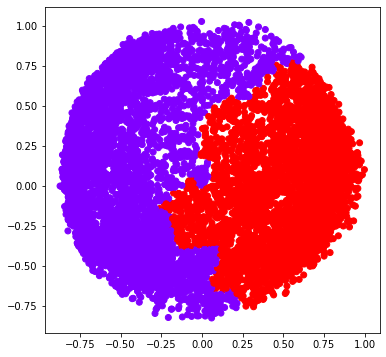

In [22]:
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

#  k = 3

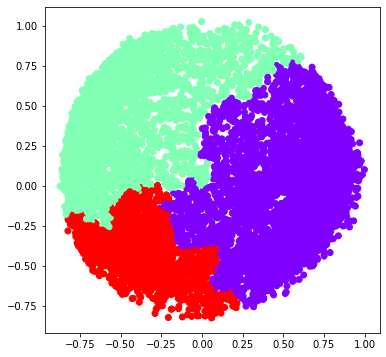

In [23]:
ac3 = AgglomerativeClustering(n_clusters = 3)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()

# k = 4

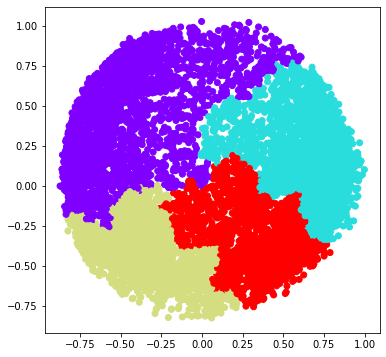

In [24]:
ac4 = AgglomerativeClustering(n_clusters = 4)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show()

# k = 5

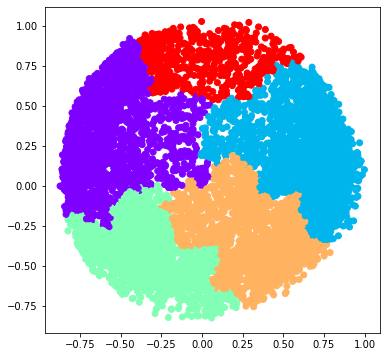

In [25]:
ac5 = AgglomerativeClustering(n_clusters = 5)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.show()

# K = 6

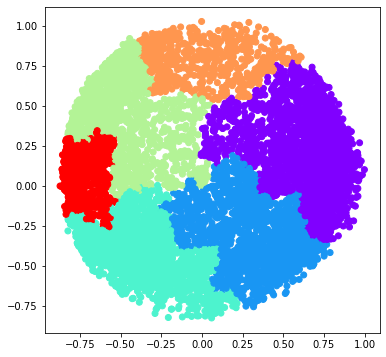

In [29]:
ac6 = AgglomerativeClustering(n_clusters = 6)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.show()

We now determine the optimal number of clusters using a mathematical technique. Here, We will use the Silhouette Scores for the purpose.

# Evaluating the different models and Visualizing the results.

In [27]:
k = [2, 3, 4, 5, 6]

# Appending the silhouette scores of the different models to the list

In [30]:
silhouette_scores = []
silhouette_scores.append(
silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(
silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(
silhouette_score(X_principal, ac6.fit_predict(X_principal)))

# Plotting a bar graph to compare the results

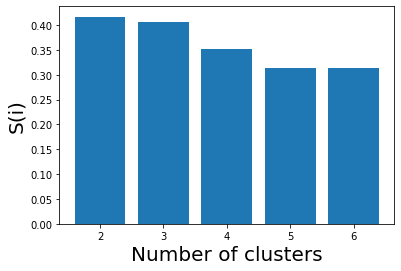

In [31]:
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

# Conclusion 

Thus, with the help of the silhouette scores, it is concluded that the optimal number of clusters for the given data and clustering technique is 2.